Yiko Li 



I am looking at two sets of data 1.)the natural gas consumption data by zipcode and 2.) Manhattan Condominium Comparable Rental Income. Both datasets are from NYC Open Data. The objective for this exploration is to compare the amount of natural gas consumption to neighborhood income level through rental value by zipcode. My hypothesis is that: neighborhoods with lower income have less accesibility to electricity, in which the lower income neighborhoods have higher natural gas consumption.

In [86]:
%matplotlib inline
import wbdata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
sns.set(style="whitegrid", color_codes=True)

In [63]:
##Natural Gas Consumption by ZIP Code - 2010
naturalgas = requests.get('https://data.cityofnewyork.us/resource/b6vf-mvej.json')
##Condominium Comparable Rental Income – Manhattan – FY 2011/2012
income = requests.get('https://data.cityofnewyork.us/resource/jmwn-n499.json')

In [64]:
naturalgas.text[:300]

'[{"_consumption_gj_":"50","_consumption_therms_":"470","building_type_service_class":"Commercial","utility_data_source":"National Grid","zip_code_zip":"10300"}\n,{"_consumption_gj_":"68","_consumption_therms_":"647","building_type_service_class":"Commercial","utility_data_source":"National Grid","zip'

In [65]:
income.text[:300]

'[{"bbl":"1000077501","bin":"1077806","borough":"1","census_tract":"9","community_board":"1","comparable_rental_1_address":"9 MAIDEN LANE","comparable_rental_1_boro_block_lot":"1-00065-0010","comparable_rental_1_building_classification":"D5-ELEVATOR","comparable_rental_1_distance_from_condo_in_miles"'

In [66]:
naturalgas = pd.read_json(naturalgas.text)
naturalgas.head()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,_consumption_gj_,_consumption_therms_,building_type_service_class,utility_data_source,zip_code,zip_code_zip
0,NaN,NaN,NaN,NaN,NaN,50.0,470.0,Commercial,National Grid,NaN,10300
1,NaN,NaN,NaN,NaN,NaN,68.0,647.0,Commercial,National Grid,NaN,10335
2,NaN,NaN,NaN,NaN,NaN,3562.0,33762.0,Large residential,National Grid,NaN,10360
3,NaN,NaN,NaN,NaN,NaN,3389.0,32125.0,Commercial,National Grid,NaN,11200
4,NaN,NaN,NaN,NaN,NaN,380.0,3605.0,Institutional,National Grid,NaN,11200


In [67]:
income = pd.read_json(income.text)
income.head()

,bbl,bin,borough,census_tract,community_board,comparable_rental_1_address,comparable_rental_1_boro_block_lot,comparable_rental_1_building_classification,comparable_rental_1_distance_from_condo_in_miles,comparable_rental_1_estimated_expense,...,manhattan_condominiums_comparable_properties_full_market_value,manhattan_condominiums_comparable_properties_gross_income_per_sqft,manhattan_condominiums_comparable_properties_gross_sqft,manhattan_condominiums_comparable_properties_market_value_per_sqft,manhattan_condominiums_comparable_properties_neighborhood,manhattan_condominiums_comparable_properties_net_operating_income,manhattan_condominiums_comparable_properties_total_units,manhattan_condominiums_comparable_properties_year_built,nta,postcode
0,1.000078e+09,1077806.0,1,9.0,1.0,9 MAIDEN LANE,1-00065-0010,D5-ELEVATOR,0.45,645225.0,...,7300000,36.51,36500,200.00,FINANCIAL,990610,42,1920.0,Battery Park City-Lower Manhattan ...,10004.0
1,1.000088e+09,1087700.0,1,9.0,1.0,600 WASHINGTON STREET,1-00602-0010,D6-ELEVATOR,1.94,1642405.0,...,30690000,52.47,126420,242.76,FINANCIAL,4870962,78,1985.0,Battery Park City-Lower Manhattan ...,10004.0
2,1.000158e+09,1082634.0,1,13.0,1.0,90 WEST STREET,1-00056-0004,D5-ELEVATOR,0.30,4259022.0,...,90970000,31.24,554174,164.15,FINANCIAL,13767000,500,NaN,Battery Park City-Lower Manhattan ...,10004.0
3,1.000158e+09,1087243.0,1,13.0,1.0,22 RIVER TERRACE,1-00016-0190,D8-ELEVATOR,0.37,4790175.0,...,67556006,47.28,249076,271.23,FINANCIAL,8991643,282,1930.0,Battery Park City-Lower Manhattan ...,10004.0
4,1.000168e+09,1000061.0,1,31704.0,1.0,211 NORTH END AVENUE,1-00016-0185,D8-ELEVATOR,0.00,3677770.0,...,54320996,45.58,219495,247.48,TRIBECA,7221385,239,1985.0,Battery Park City-Lower Manhattan ...,10280.0


2.Slice the data by column

Data Set # 1: Natural Gas Consumption by ZIP Code - 2010

In [68]:
##Energy consumption measured in gigajoule = 10^9
grouped = naturalgas.groupby(['_consumption_gj_','_consumption_therms_', 'zip_code_zip'])

In [69]:
naturalgas['naturalgas_total'] = naturalgas['_consumption_gj_']+ naturalgas['_consumption_therms_']

In [70]:
grouped_total = grouped['naturalgas_total']

In [71]:
grouped_total.agg('mean')

_consumption_gj_  _consumption_therms_  zip_code_zip
0.0               1.0                   10469                  1.0
2.0               23.0                  11423                 25.0
7.0               65.0                  11402                 72.0
8.0               75.0                  10464                 83.0
13.0              128.0                 11359                141.0
16.0              151.0                 11469                167.0
19.0              184.0                 11241                203.0
28.0              265.0                 10005                293.0
29.0              275.0                 11400                304.0
30.0              280.0                 11400                310.0
31.0              295.0                 11422                326.0
32.0              301.0                 11279                333.0
33.0              313.0                 10461                346.0
35.0              336.0                 11362                371.0
36.0     

Data Set # 2: Condominium Comparable Rental Income – Manhattan – FY 2011/2012

In [ ]:
grouped = income.groupby(['manhattan_condominiums_comparable_properties_market_value_per_sqft','manhattan_condominiums_comparable_properties_net_operating_income', 'postcode'])

In [ ]:
##income['income_total'] =naturalgas['_consumption_gj_']+ naturalgas['_consumption_therms_']

In [ ]:
grouped_total = grouped['income_total']

In [ ]:
grouped_total.agg('mean')




3.
Slice the data by row

In [ ]:
naturalgas.head().iloc[:1,:10]

In [ ]:
naturalgas.head().loc['0':'3']





4.Use the .groupby method to create a grouped set of data

In [ ]:
grouped = naturalgas.groupby(['zip_code_zip','naturalgas_total'])

In [ ]:
grouped.groups

5.
Seaborn Visualizations

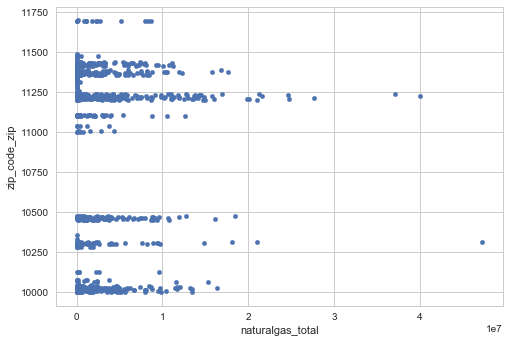

In [91]:
naturalgas.plot(x ='naturalgas_total', y = 'zip_code_zip', kind = 'scatter')

In [ ]:
sns.distplot(income['income_total']);

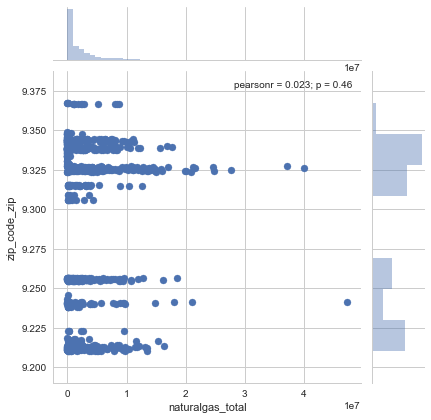

In [88]:
sns.jointplot(naturalgas['naturalgas_total'], np.log(naturalgas['zip_code_zip']))

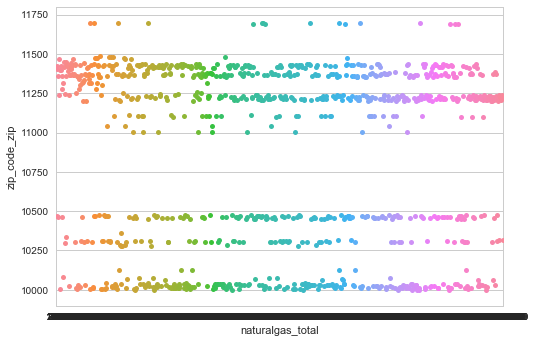

In [87]:
sns.stripplot(x="naturalgas_total", y="zip_code_zip", data=naturalgas, jitter=True);


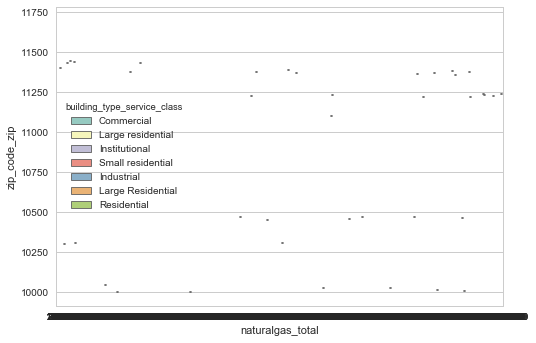

In [89]:
sns.violinplot(x="naturalgas_total", y="zip_code_zip", hue="building_type_service_class", data=naturalgas,
             inner="stick", palette="Set3");

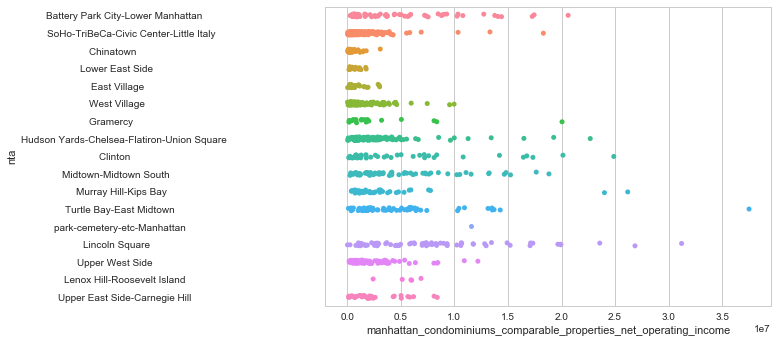

In [90]:
sns.stripplot(x="manhattan_condominiums_comparable_properties_net_operating_income", y="nta", data=income, jitter=True);

---------------------
Additional documentations on 
API Data Requesting 

In [ ]:
import wbdata

In [ ]:
wbdata.get_source()

In [ ]:
wbdata.get_indicator(source=38)

In [ ]:
wbdata.get_indicator(source=35)

In [ ]:
wbdata.get_indicator(source=24)

In [6]:
wbdata.search_indicators("renewable energy")

4.1.2_REN.ELECTRICITY.OUTPUT	Renewable energy electricity output (GWh)
3.1_RE.CONSUMPTION          	Renewable energy consumption (TJ)
2.1_SHARE.TOTAL.RE.IN.TFEC  	Renewable energy consumption(% in TFEC)
EG.FEC.RNEW.ZS              	Renewable energy consumption (% of total final energy consumption)
RISE.RE.TO                  	RISE Renewable Energy - Overall country score
RISE.RE.PS                  	RISE Renewable Energy - Pricing and Subsidies
RISE.RE.PR                  	RISE Renewable Energy - Policies and Regulations
RISE.RE.PL                  	RISE Renewable Energy - Planning
RISE.RE.PE                  	RISE Renewable Energy - Procedural Efficiency


In [7]:
wbdata.get_data("IC.BUS.EASE.XQ", country="USA")

[{'country': {'id': 'US', 'value': 'United States'},
  'date': '2017',
  'decimal': '0',
  'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business index (1=most business-friendly regulations)'},
  'value': '6'},
 {'country': {'id': 'US', 'value': 'United States'},
  'date': '2016',
  'decimal': '0',
  'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business index (1=most business-friendly regulations)'},
  'value': None},
 {'country': {'id': 'US', 'value': 'United States'},
  'date': '2015',
  'decimal': '0',
  'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business index (1=most business-friendly regulations)'},
  'value': None},
 {'country': {'id': 'US', 'value': 'United States'},
  'date': '2014',
  'decimal': '0',
  'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business index (1=most business-friendly regulations)'},
  'value': None},
 {'country': {'id': 'US', 'value': 'United States'},
  'date': '2013',
  'dec